In [5]:
import os
import json
import numpy as np
import nibabel as nib


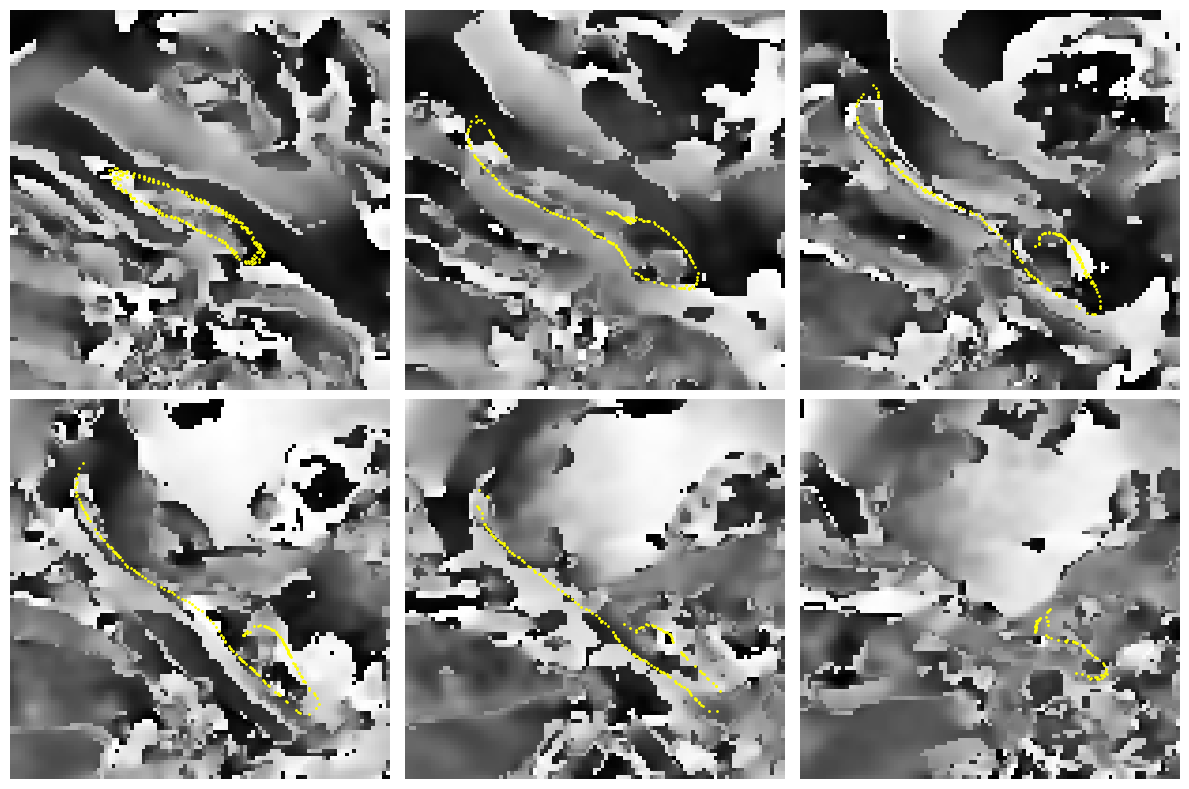

In [119]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt


hipp_vol  = 'output/sub-HCD0001305_hemi-R_space-cropB0_desc-DT_eigenvecs.nii.gz'
hipp_surf = 'output/sub-HCD0001305_hemi-R_space-B0_den-0p5mm_label-hipp_midthickness.surf.gii'

# Load volume
nii = nib.load(hipp_vol)
data = nii.get_fdata()
affine = nii.affine

# Load surface
gii = nib.load(hipp_surf)
coords = gii.darrays[1].data
coords_vox = nib.affines.apply_affine(np.linalg.inv(affine), coords)


fig, ax = plt.subplots(2, 3, figsize=(12,8))
ax = ax.flatten()

for idx, slice_idx in enumerate(np.linspace(30,65,6)):


    # Plot volume data
    slice_idx = int(slice_idx)
    ax[idx].imshow(data[slice_idx, :, :, 2].T, cmap='gray', origin='lower')

    # Plot surface vertices.
    mask = np.abs(coords_vox[:,0] - slice_idx) < .5
    ax[idx].scatter(
        coords_vox[mask,1],
        coords_vox[mask,2],
        s=1, c='yellow'
    )
    ax[idx].axis('off')

plt.tight_layout()
plt.show()

In [7]:

# for hemi in ['L','R']:

#     # Transform cropped T1 to B0 space.
#     crop_T1 = config[f'hipp_crop_T1_{hemi}']
#     crop_B0 = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-preproc_T1w.nii.gz'

#     os.system(f'mrtransform {crop_T1} {crop_B0} -linear {B0_to_T1} -force')

#     # Crop and upsample (0.5mm) the diffusion weighted images.
#     crop_dwi_path = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-upsampled_dwi.nii.gz'
#     os.system(f'mrgrid {dwi_path} regrid -voxel 0.5 -template {crop_B0} {crop_dwi_path} -force')


#     # Fit diffusion tensor and kurtosis-tensor on cropped/upsampled DWI image.
#     dt_path  = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-diffusion_tensor.nii.gz'
#     dkt_path = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-diffusion_kurtosis_tensor.nii.gz'

#     os.system(f'dwi2tensor {crop_dwi_path} {dt_path} -dkt {dkt_path} -fslgrad {bvecs} {bvals} -force')


#     # Get diffusion tensor metrics.
#     adc_path      = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_ADC.nii.gz'
#     fa_path       = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_FA.nii.gz'
#     eigenval_path = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_eigenvals.nii.gz'
#     eigenvec_path = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_eigenvecs.nii.gz'

#     os.system(f'tensor2metric \
#         -fa    {fa_path} \
#         -adc   {adc_path} \
#         -value {eigenval_path} \
#         -vector {eigenvec_path} -num 1,2,3 \
#         {dt_path} \
#         -force'
#     )

#     # Merge all DKT params expected by DIPY.
#     dt_eigenvals = nib.load(eigenval_path).get_fdata()
#     dt_eigenvecs = nib.load(eigenvec_path).get_fdata()
#     dkt_params = nib.load(dkt_path).get_fdata()

#     params = np.concatenate([
#         dt_eigenvals,
#         dt_eigenvecs,
#         dkt_params
#         ], axis=-1
#     )

#     # Write DKT parameters to 4D NIFTI.
#     template_nii = nib.load(crop_dwi_path)
#     params_nii = nib.Nifti1Image(
#         params,
#         affine=template_nii.affine,
#         header=template_nii.header
#     )

#     dkt_params_path = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DKT_params.nii.gz'
#     nib.save(params_nii, dkt_params_path)


In [8]:

# for hemi in ['L','R']:

#     # Define paths.
#     crop_B0         = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-preproc_T1w.nii.gz'
#     crop_dwi_path   = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-upsampled_dwi.nii.gz'

#     dt_path         = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-diffusion_tensor.nii.gz'
#     dkt_path        = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-diffusion_kurtosis_tensor.nii.gz'

#     adc_path        = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_ADC.nii.gz'
#     fa_path         = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_FA.nii.gz'
#     eigenval_path   = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_eigenvals.nii.gz'
#     eigenvec_path   = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_eigenvecs.nii.gz'

#     dkt_params_path = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DKT_params.nii.gz'


#     # Transform cropped T1 to B0 space.
#     crop_T1 = config[f'hipp_crop_T1_{hemi}']
#     os.system(f'mrtransform {crop_T1} {crop_B0} -linear {B0_to_T1} -force')

#     # Crop and upsample the diffusion weighted images to 0.5mm resolution.
#     os.system(f'mrgrid {dwi_path} regrid -voxel 0.5 -template {crop_B0} {crop_dwi_path} -force')

#     # Fit diffusion-tensor and diffusion-kurtosis-tensor on cropped/upsampled DWI image.
#     os.system(f'dwi2tensor {crop_dwi_path} {dt_path} -dkt {dkt_path} -fslgrad {bvecs} {bvals} -force')

#     # Get diffusion-tensor metrics.
#     os.system(f'tensor2metric \
#         -fa    {fa_path} \
#         -adc   {adc_path} \
#         -value {eigenval_path} \
#         -vector {eigenvec_path} -num 1,2,3 \
#         {dt_path} \
#         -force'
#     )

#     # Merge all DKT params expected by DIPY.
#     dt_eigenvals = nib.load(eigenval_path).get_fdata()
#     dt_eigenvecs = nib.load(eigenvec_path).get_fdata()
#     dkt_params = nib.load(dkt_path).get_fdata()

#     params = np.concatenate([
#         dt_eigenvals,
#         dt_eigenvecs,
#         dkt_params
#         ], axis=-1
#     )

#     # Write DKT parameters to 4D NIFTI.
#     template_nii = nib.load(crop_dwi_path)
#     params_nii = nib.Nifti1Image(
#         params,
#         affine=template_nii.affine,
#         header=template_nii.header
#     )

#     nib.save(params_nii, dkt_params_path)


In [9]:
# # Fit diffusion tensor and kurtosis-tensor on full DWI image.
# dt_path  = f'output/sub-{subject}_space-B0_desc-DT_tensor.nii.gz'
# dkt_path = f'output/sub-{subject}_space-B0_desc-DKT_tensor.nii.gz'

# os.system(f'dwi2tensor {dwi} {dt_path} -dkt {dkt_path} -fslgrad {bvecs} {bvals} -force')


In [10]:

# # Fit diffusion tensor and kurtosis-tensor on cropped/upsampled DWI image.
# dt_path  = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-diffusion_tensor.nii.gz'
# dkt_path = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-diffusion_kurtosis_tensor.nii.gz'

# os.system(f'dwi2tensor {crop_dwi_path} {dt_path} -dkt {dkt_path} -fslgrad {bvecs} {bvals} -force')


In [11]:
# dt = nib.load(dt_image).get_fdata()
# dkt = nib.load(dkt_image).get_fdata()

In [12]:
# from dipy.io.image import load_nifti
# import dipy.reconst.dki as dki
# from dipy.io.gradients import read_bvals_bvecs
# from dipy.core.gradients import gradient_table


# bvals_dipy, bvecs_dipy = read_bvals_bvecs(bvals, bvecs)
# gtab = gradient_table(bvals_dipy, bvecs=bvecs_dipy)

# data, affine = load_nifti(upsampled_dwi)

# # dki_model = dki.DiffusionKurtosisModel(gtab)

# # dki_fit = dki_model.fit(data)

In [13]:
# # https://docs.dipy.org/1.11.0/reference/dipy.reconst.html#dipy.reconst.dki.apparent_kurtosis_coef

# FA = dki_fit.fa

# template_nii = nib.load(upsampled_dwi)


# new_nii = nib.Nifti1Image(FA, affine=template_nii.affine, header=template_nii.header)
# nib.save(new_nii, 'new_file.nii.gz')


In [14]:
# from dipy.reconst.dki import apparent_kurtosis_coef
# # from dipy.core.sphere import Sphere

# # hipp_surf_B0 = nib.load('output/sub-HCD0001305_hemi-R_space-B0_den-0p5mm_label-hipp_midthickness.surf.gii')
# # faces  = hipp_surf_B0.darrays[0].data
# # coords = hipp_surf_B0.darrays[1].data


# # # Compute normals for each face.
# # face_vectors1 = coords[faces[:,1]] - coords[faces[:,0]]
# # face_vectors2 = coords[faces[:,2]] - coords[faces[:,0]]
# # face_normals = np.cross(face_vectors1, face_vectors2)
# # face_normals /= np.linalg.norm(face_normals, axis=1, keepdims=True)

# # vertex_normals = np.zeros_like(coords)

# # # Average face normals for each vertex
# # for i in range(3):
# #     np.add.at(vertex_normals, faces[:, i], face_normals)

# # # Normalize vertex normals
# # vertex_normals /= np.linalg.norm(vertex_normals, axis=1, keepdims=True)


# # params = dki_fit.fit_array[30,36,49].model_params
# # sphere_normals = Sphere(xyz=vertex_normals)
# # K_normal = apparent_kurtosis_coef(dki_fit.model_params, sphere_normals)

# dt = nib.load(dt_image).get_fdata()
# dkt = nib.load(dkt_image).get_fdata()


# vox_x = 0
# vox_y = 0
# vox_z = 0

# dt[vox_x,vox_y,vox_z,:]

In [15]:
# # Get diffusion tensor metrics.
# adc_path      = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_ADC.nii.gz'
# fa_path       = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_FA.nii.gz'
# eigenval_path = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_eigenvals.nii.gz'
# eigenvec_path = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_eigenvecs.nii.gz'

# os.system(f'tensor2metric \
#     -fa    {fa_path} \
#     -adc   {adc_path} \
#     -value {eigenval_path} \
#     -vector {eigenvec_path} -num 1,2,3 \
#     {dt_image} \
#     -force'
# )

In [16]:
# dkt_params_path = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DKT_params.nii.gz'
# upsampled_dwi = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-upsampled_dwi.nii.gz'


# dt_eigenvals = nib.load('eigenvals.nii.gz').get_fdata()
# dt_eigenvecs = nib.load('eigenvecs.nii.gz').get_fdata()
# dkt_params = nib.load(dkt_image).get_fdata()

# params = np.concatenate([
#     dt_eigenvals,
#     dt_eigenvecs,
#     dkt_params
#     ], axis=-1
# )

# # Write DKT parameters to 4D NIFTI.
# template_nii = nib.load(upsampled_dwi)
# params_nii = nib.Nifti1Image(
#     params,
#     affine=template_nii.affine,
#     header=template_nii.header
# )

# nib.save(params_nii, 'params.nii.gz')


In [17]:
# import os
# import json
# import numpy as np
# import nibabel as nib

# with open('config.json') as f:
#     config = json.load(f)

# subject    = config['subject']

# dwi_path   = config['dwi']
# bvecs      = config['bvecs']
# bvals      = config['bvals']

# B0_to_T1   = config['B0_to_T1']


# def _regrid_DWI():
#     '''Create cropB0 space, then crop and upsample the diffusion weighted images to 0.5mm resolution.'''

#     os.system(f'mrtransform {crop_T1} {crop_B0} -linear {B0_to_T1} -force')
#     os.system(f'mrgrid {dwi_path} regrid -voxel 0.5 -template {crop_B0} {crop_dwi_path} -force')


# def _fit_tensors():
#     '''Fit diffusion tensor (DT) and diffusion-kurtosis-tensor (DTK) on cropped/upsampled DWI image.'''

#     os.system(f'dwi2tensor {crop_dwi_path} {dt_path} -dkt {dkt_path} -fslgrad {bvecs} {bvals} -force')


# def _get_tensor_metrics():
#     '''Get diffusion tensor metrics.'''

#     os.system(f'tensor2metric \
#         -fa     {fa_path} \
#         -adc    {adc_path} \
#         -value  {eigenval_path} \
#         -vector {eigenvec_path} -num 1,2,3 \
#         {dt_path} \
#         -force'
#     )


# def _merge_params():
#     '''Merge all DT and DKT params expected by DIPY.'''

#     dt_eigenvals = nib.load(eigenval_path).get_fdata()
#     dt_eigenvecs = nib.load(eigenvec_path).get_fdata()
#     dkt_params = nib.load(dkt_path).get_fdata()

#     params = np.concatenate([
#         dt_eigenvals,
#         dt_eigenvecs,
#         dkt_params
#         ], axis=-1
#     )

#     # Write DKT parameters to 4D NIFTI.
#     template_nii = nib.load(crop_dwi_path)
#     params_nii = nib.Nifti1Image(
#         params,
#         affine=template_nii.affine,
#         header=template_nii.header
#     )
#     nib.save(params_nii, dkt_params_path)






# for hemi in ['L','R']:

#     # Define paths.
#     crop_T1 = config[f'hipp_crop_T1_{hemi}']

#     crop_B0         = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-preproc_T1w.nii.gz'
#     crop_dwi_path   = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-upsampled_dwi.nii.gz'

#     dt_path         = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-diffusion_tensor.nii.gz'
#     dkt_path        = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-diffusion_kurtosis_tensor.nii.gz'

#     adc_path        = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_ADC.nii.gz'
#     fa_path         = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_FA.nii.gz'
#     eigenval_path   = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_eigenvals.nii.gz'
#     eigenvec_path   = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DT_eigenvecs.nii.gz'

#     dkt_params_path = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DKT_params.nii.gz'

#     # Run pipeline.
#     _regrid_DWI()
#     _fit_tensors()
#     _get_tensor_metrics()
#     _merge_params()



In [301]:
# import numpy as np
# import nibabel as nib
# from dipy.data import get_sphere
# from dipy.reconst import dki

# sphere_name = 'symmetric362'
# subject = 'HCD0001305'


# for hemi in ['L','R']:

#     params_nii = nib.load(f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DKT_params.nii.gz')
#     params = params_nii.get_fdata()

#     # Get directions.
#     sphere = get_sphere(name=sphere_name)
#     n_dirs = len(sphere.theta)

#     # Flatten voxels, calculate directional kurtosis, reshape.
#     X, Y, Z, P = params.shape

#     params_flat   = params.reshape(-1, P)
#     kurtosis_flat = dki.apparent_kurtosis_coef(params_flat, sphere)
#     kurtosis_vox  = kurtosis_flat.reshape(X, Y, Z, n_dirs)

#     # Write directional kurtosis to numpy and NIFTI.
#     kurtosis_path_npy = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-kurtosis_sphere-{sphere_name}.npy'
#     kurtosis_path_nii = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-kurtosis_sphere-{sphere_name}.nii.gz'

#     np.save(kurtosis_path_npy, kurtosis_vox)
#     kurtosis_nii = nib.Nifti1Image(
#         kurtosis_vox,
#         affine=params_nii.affine,
#         header=params_nii.header
#     )
#     nib.save(kurtosis_nii, kurtosis_path_nii)



In [300]:
# import matplotlib.pyplot as plt
# from dipy.data import get_sphere

# # Load spheres
# sphere_sym = get_sphere('symmetric362')
# v_sym = sphere_sym.vertices

# # Plot
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')
# for v in v_sym:
#     ax.plot(
#         [0, v[0]],
#         [0, v[1]],
#         [0, v[2]],
#         c='k', lw=.5
#     )

# ax.view_init(elev=30, azim=45)


In [302]:

params_nii = nib.load(f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-DKT_params.nii.gz')
params = params_nii.get_fdata()

# Get directions.
sphere = get_sphere(name=sphere_name)
n_dirs = len(sphere.theta)



/Users/jkember/Documents/projects/hippocampus_dMRI/.venv/lib/python3.11/site-packages/dipy/core/geometry.py:150: UserWarning: 'where' used without 'out', expect unitialized memory in output. If this is intentional, use out=None.
  cos = np.divide(z, r, where=r > 0)
/Users/jkember/Documents/projects/hippocampus_dMRI/.venv/lib/python3.11/site-packages/dipy/core/geometry.py:151: UserWarning: 'where' used without 'out', expect unitialized memory in output. If this is intentional, use out=None.
  theta = np.arccos(cos, where=(cos >= -1) & (cos <= 1))


In [386]:
from nilearn import surface

subject = 'HCD0001305'
hemi = 'L'

adc_path   = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-kurtosis_sphere-symmetric362.nii.gz'
# mask_path  = f'output/sub-{subject}_hemi-{hemi}_space-cropB0_desc-subfields.nii.gz'

inner_path = f'output/sub-{subject}_hemi-{hemi}_space-B0_den-0p5mm_label-hipp_inner.surf.gii'
outer_path = f'output/sub-{subject}_hemi-{hemi}_space-B0_den-0p5mm_label-hipp_midthickness.surf.gii'


surf_adc = surface.vol_to_surf(
    img=adc_path,
    surf_mesh=outer_path,
    inner_mesh=inner_path,
    interpolation='linear',
    # mask_img=mask_path,
    kind='depth'
)



In [ ]:
import numpy as np
import pandas as pd
import nibabel as nib


def _vertex_normals(vertices, faces):

    # Get vectors.
    v0 = vertices[faces[:, 0]]
    v1 = vertices[faces[:, 1]]
    v2 = vertices[faces[:, 2]]

    # Get normals of face (cross product).
    fn = np.cross(v1 - v0, v2 - v0)
    fn = fn / np.linalg.norm(fn, axis=1, keepdims=True)  # normalize

    # Vertex normals: sum face normals of adjacent faces.
    N = vertices.shape[0]
    vn = np.zeros((N, 3), dtype=np.float64)

    for i in range(3):
        np.add.at(vn, faces[:, i], fn)

    # Normalize.
    normals = vn / np.linalg.norm(vn, axis=1, keepdims=True)

    return normals


def _cartesian_to_spherical(vectors):

    x = vectors[:, 0]
    y = vectors[:, 1]
    z = vectors[:, 2]

    phi   = np.arctan2(y, x)
    theta = np.arccos(np.clip(z, -1, 1))

    return theta, phi


for surface_type in ['midthickness','inner','outer']:

    surf_path    = f'output/sub-{subject}_hemi-{hemi}_space-B0_den-0p5mm_label-hipp_{surface_type}.surf.gii'
    normals_path = f'output/sub-{subject}_hemi-{hemi}_space-B0_label-{surface_type}_desc-surface_normals.csv'

    surf = nib.load(surf_path)
    faces    = surf.darrays[0].data
    vertices = surf.darrays[1].data

    normals    = _vertex_normals(vertices, faces)
    theta, phi = _cartesian_to_spherical(normals)

    normals_df = pd.DataFrame({
        'x':normals[:,0],
        'y':normals[:,1],
        'z':normals[:,2],
        'theta':theta,
        'phi':phi
    })

    normals_df.to_csv(normals_path, index=False)


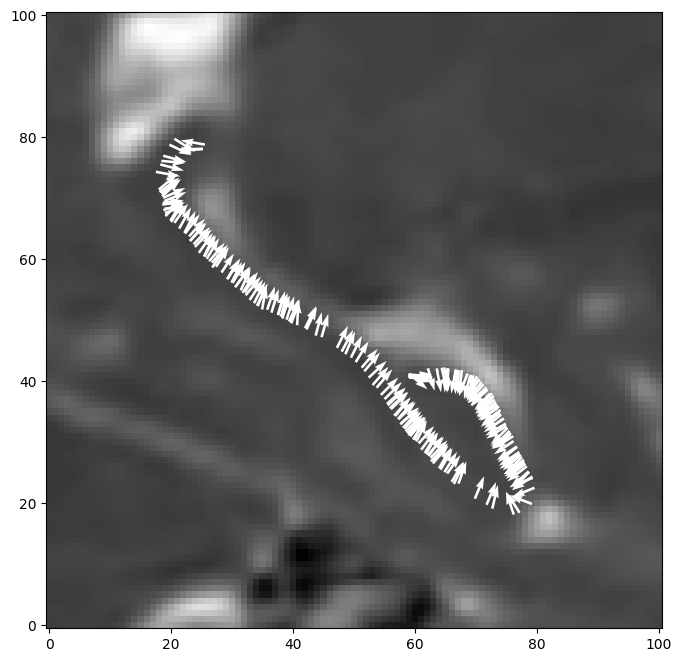

In [493]:
import nibabel as nib
import numpy as np


normals = normals_df[['x','y','z']].to_numpy()

t1_file = 'output/sub-HCD0001305_hemi-L_space-cropB0_desc-DT_ADC.nii.gz'
t1_img = nib.load(t1_file)
t1_data = t1_img.get_fdata()




# Convert vertices to voxel coordinates
homog = np.c_[vertices, np.ones(len(vertices))]
vox_coords = (np.linalg.inv(t1_img.affine) @ homog.T)[:3].T

# Sagittal slice index
x_slice = 50
slice_data = t1_data[x_slice,:,:]

# Select vertices near this slice
mask = np.abs(vox_coords[:,0]-x_slice) < 0.5
slice_vertices = vox_coords[mask]
slice_normals = normals[mask]

# Plot slice with normals
plt.figure(figsize=(8,8))
plt.imshow(slice_data.T, cmap='gray', origin='lower')

scale = 5.0
plt.quiver(
    slice_vertices[:,1],
    slice_vertices[:,2],
    slice_normals[:,1]*scale,
    slice_normals[:,2]*scale,
    color='w', angles='xy', scale_units='xy'
)


plt.show()
